# Linear regression plot


In [3]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats
from sklearn.metrics import mean_squared_error
from math import sqrt
import os
from os import listdir
from datetime import datetime
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

In [15]:
# linear regression
def linear_regression_plot (path, date_format,nrows,ncols,color_modis,color_maiac, plot):
    '''
    The function allows plotting the linear regression of each AERONET station.
    In addition, the main statistics and the linear regression equation are shown.
    The data of each station of interest is contained in a folder in .csv format previously processed.
    This function goes through the folder and takes each of these files to later make the plot of interest.

    Variables:
    - path : path to the folder where the files in .csv format are located
    - date_format: format of the date column of the file of interest. 
    For example: date_format='%Y-%m-%d %H:%M:%S'
    - nrows: number of rows the plot will have
    - ncols: number of columnas the plot will have
    - color palette for each  for stations MAIAC-MODIS For example: 
    color_modis = ["#74c476","#fed976","#fb6a4a", "#74a9cf","#df65b0","#807dba"]
    color_maiac = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"]
    '''
    i=0 
    j=0 
    edge_color_maiac = color_maiac #["#004529", "#feb24c","#67000d","#081d58","#67001f","#4d004b"]
    edge_color_modis = color_modis#["#41ab5d","#feb24c","#cb181d","#045a8d","#ce1256","#810f7c"]
    

    fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(14,6),dpi=500)
    #The folder where the files of each station are located is browsed.
    for p,files in enumerate(os.listdir(path)):
        print(p)
        N = len(os.listdir(path))
        data = pd.read_csv(os.path.join(path,files))
        #A column is created with the date called "Timestamp".
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x,date_format))
        #Becomes the index column
        data.set_index('Timestamp', inplace = True)
        data_mean_period_len =len(data.dropna(how='all'))
        # Station Name
        station_name = files [2:4]
        ########################                VARIABLES                ########################
        
        y_modis = data ["AOD_550_MODIS_mean"]
        y_maiac= data["AOD_550_MAIAC_mean"]
        x= data["AOD_550_AER_mean"]
        
        mask = ~np.isnan(x) & ~np.isnan(y_maiac)& ~np.isnan(y_modis)
        x= x[mask]
        y_maiac = y_maiac[mask]
        y_modis = y_modis[mask]
        
        #numero de datos sin contar los NaNs
        n = len(x)
        #Calculo la pendiente, la ordenada al origen y el R2
        slope_maiac , intercept_maiac , r_maiac , p_maiac , stderr_maiac  = scipy.stats.linregress(x , y_maiac)
        slope_modis , intercept_modis , r_modis , p_modis , stderr_modis  = scipy.stats.linregress(x , y_modis)

        # R2
        R2_modis=r_modis*r_modis
                                                                                                               
        R2_maiac=r_maiac*r_maiac

        #Calculo RMSE
        #RMSE_modis = mean_squared_error(y_modis, x, squared = True)
        #RMSE_maiac = mean_squared_error(y_maiac, x, squared = True)
        RMSE_modis = mean_squared_error(y_modis, x, squared = False)
        RMSE_maiac = mean_squared_error(y_maiac, x, squared = False)
        bias_modis = round(( sum(y_modis - x)/n),2)
        bias_maiac = round(( sum(y_maiac - x)/n),2)
                
        ########################                PREDICT                ########################
            
        y_modis_p = data ["AOD_550_MODIS_mean"].values.reshape(-1,1)
        y_maiac_p= data["AOD_550_MAIAC_mean"].values.reshape(-1,1)
        x_p= data["AOD_550_AER_mean"].values.reshape(-1,1)

        
        linear_regresion_modis = LinearRegression()
        linear_regresion_maiac = LinearRegression()

        linear_regresion_modis.fit(x_p,y_modis_p)
        linear_regresion_maiac.fit(x_p,y_maiac_p)

        li_predict_maiac = linear_regresion_maiac.predict(x_p)
        li_predict_modis = linear_regresion_modis.predict(x_p)
        #print(files)
        ########################                PLOT                ########################
        # Figure
        #Scatter plot Unit vs Ref
        ax[i][j].scatter(x, y_modis,  c=color_modis[p] ,edgecolors=edge_color_modis[p],alpha=0.5,  s=15,label="MODIS")
        ax[i][j].scatter(x, y_maiac,  c=color_maiac[p] ,edgecolors=edge_color_maiac[p],alpha=0.5,  s=15,label="MAIAC")
       


        ax[i][j].plot(x_p,li_predict_modis,c=color_modis[p],linestyle="-",linewidth=2.5)
        ax[i][j].plot(x_p,li_predict_maiac,c=color_maiac[p],linestyle="-",linewidth=2.5)
        
        #add the line 1:1
        ax[i][j].plot([0, 1.6], [0,1.6], color='black', linewidth=1, alpha=0.8, linestyle = '--')
        #Ticks
        ax[i][j].set_xlim(0, 1.8)
        ax[i][j].set_ylim(0, 1.8)
        ax[i][j].yaxis.set_ticks(np.arange(0.2, 1.85, 0.4))
        ax[i][j].xaxis.set_ticks(np.arange(0.2, 1.85, 0.4))
        
        ## Linear regression equation
        ax[i][j].text(0.05, 1.6, "MODIS =" , fontsize=9, ha="left", va="bottom", fontweight = "bold")
        ax[i][j].text(0.05, 1.45, "MAIAC =", fontsize=9, ha="left", va="bottom",fontweight = "bold")
        ax[i][j].text(0.45, 1.6, (str(round (intercept_modis,2)) + " + "+ str(round (slope_modis,2)) + " AOD") , fontsize=9, ha="left", va="bottom")#, bbox=dict(boxstyle="round", fc=(1.0, 0.99, 0.99)))
        ax[i][j].text(0.45, 1.45, (str(round (intercept_maiac,2)) + " + "+ str(round (slope_maiac,2))+ " AOD") , fontsize=9, ha="left", va="bottom")#, bbox=dict(boxstyle="round", fc=(1.0, 0.99, 0.99)))

        # Statistics by station
        ax[i][j].text(1.38, 0.68, "MODIS" , fontsize=8, ha="center", va="bottom", fontweight = "bold")
        ax[i][j].text(1.65, 0.68, "MAIAC" , fontsize=8, ha="center", va="bottom",fontweight = "bold")
        ax[i][j].text(1, 0.55, r'$R^{2}$ ', fontsize=10, ha="left", va="center")
        ax[i][j].text(1, 0.40, r'$RMSE$ ',fontsize=10,ha="left", va="center")
        ax[i][j].text(1, 0.25, r'$Bias$', fontsize=10,ha="left", va="center")
        ax[i][j].text(1, 0.1, r'$n$    ', fontsize=10,ha="left", va="center")

        #Statistics by station for MODIS
        ax[i][j].text(1.30, 0.55,(round(R2_modis,2)) , fontsize=10, ha="left", va="center")
        ax[i][j].text(1.30, 0.40,  (round(RMSE_modis,2)) , fontsize=10,ha="left", va="center")
        ax[i][j].text(1.30, 0.25, (round(bias_modis,2)) , fontsize=10,ha="left", va="center")#,
        ax[i][j].text(1.30, 0.1, n , fontsize=10,ha="left", va="center")

        # Statistics by station for  MAIAC
        ax[i][j].text(1.55, 0.55,(round(R2_maiac,2)) , fontsize=10, ha="left", va="center")
        ax[i][j].text(1.55, 0.40,   (round(RMSE_maiac,2)) , fontsize=10,ha="left", va="center")
        ax[i][j].text(1.55, 0.25,  bias_maiac, fontsize=10,ha="left", va="center")#,
        ax[i][j].text(1.55, 0.1,  n , fontsize=10,ha="left", va="center")
         
        # Title of each subplot corresponds to the name of the AERONET station.
        ax[i][j].set_title(station_name,fontsize=13,fontdict={'family': 'serif', 
            'color' : 'Black',
            'weight': 'bold',
            'size': 16})
         # Tittle legend
       # tittle_legend = ["MODIS","MAIAC"]
        ax[i][j].legend(frameon = False, markerfirst = False, fontsize = 10,loc='upper right')
        # Axes names
        ax[i][j].set_xlabel(r'$AOD_{AERONET}$',size=10)
        ax[i][j].set_ylabel(r'$AOD_{SATELLITE}$',size=10)
        # Configuration of subplots
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)
        
        # Location of data in each subplot
        if j == ncols-1:
            i = i+1
            j = 0
        else:
            j = j+1
   # Save the plot to the current path
    if plot == 'save':
        return(plt.savefig("linear_regression_plot.jpg", dpi=500))
    else:
        return(plt.show())

0
1
2
3
4
5


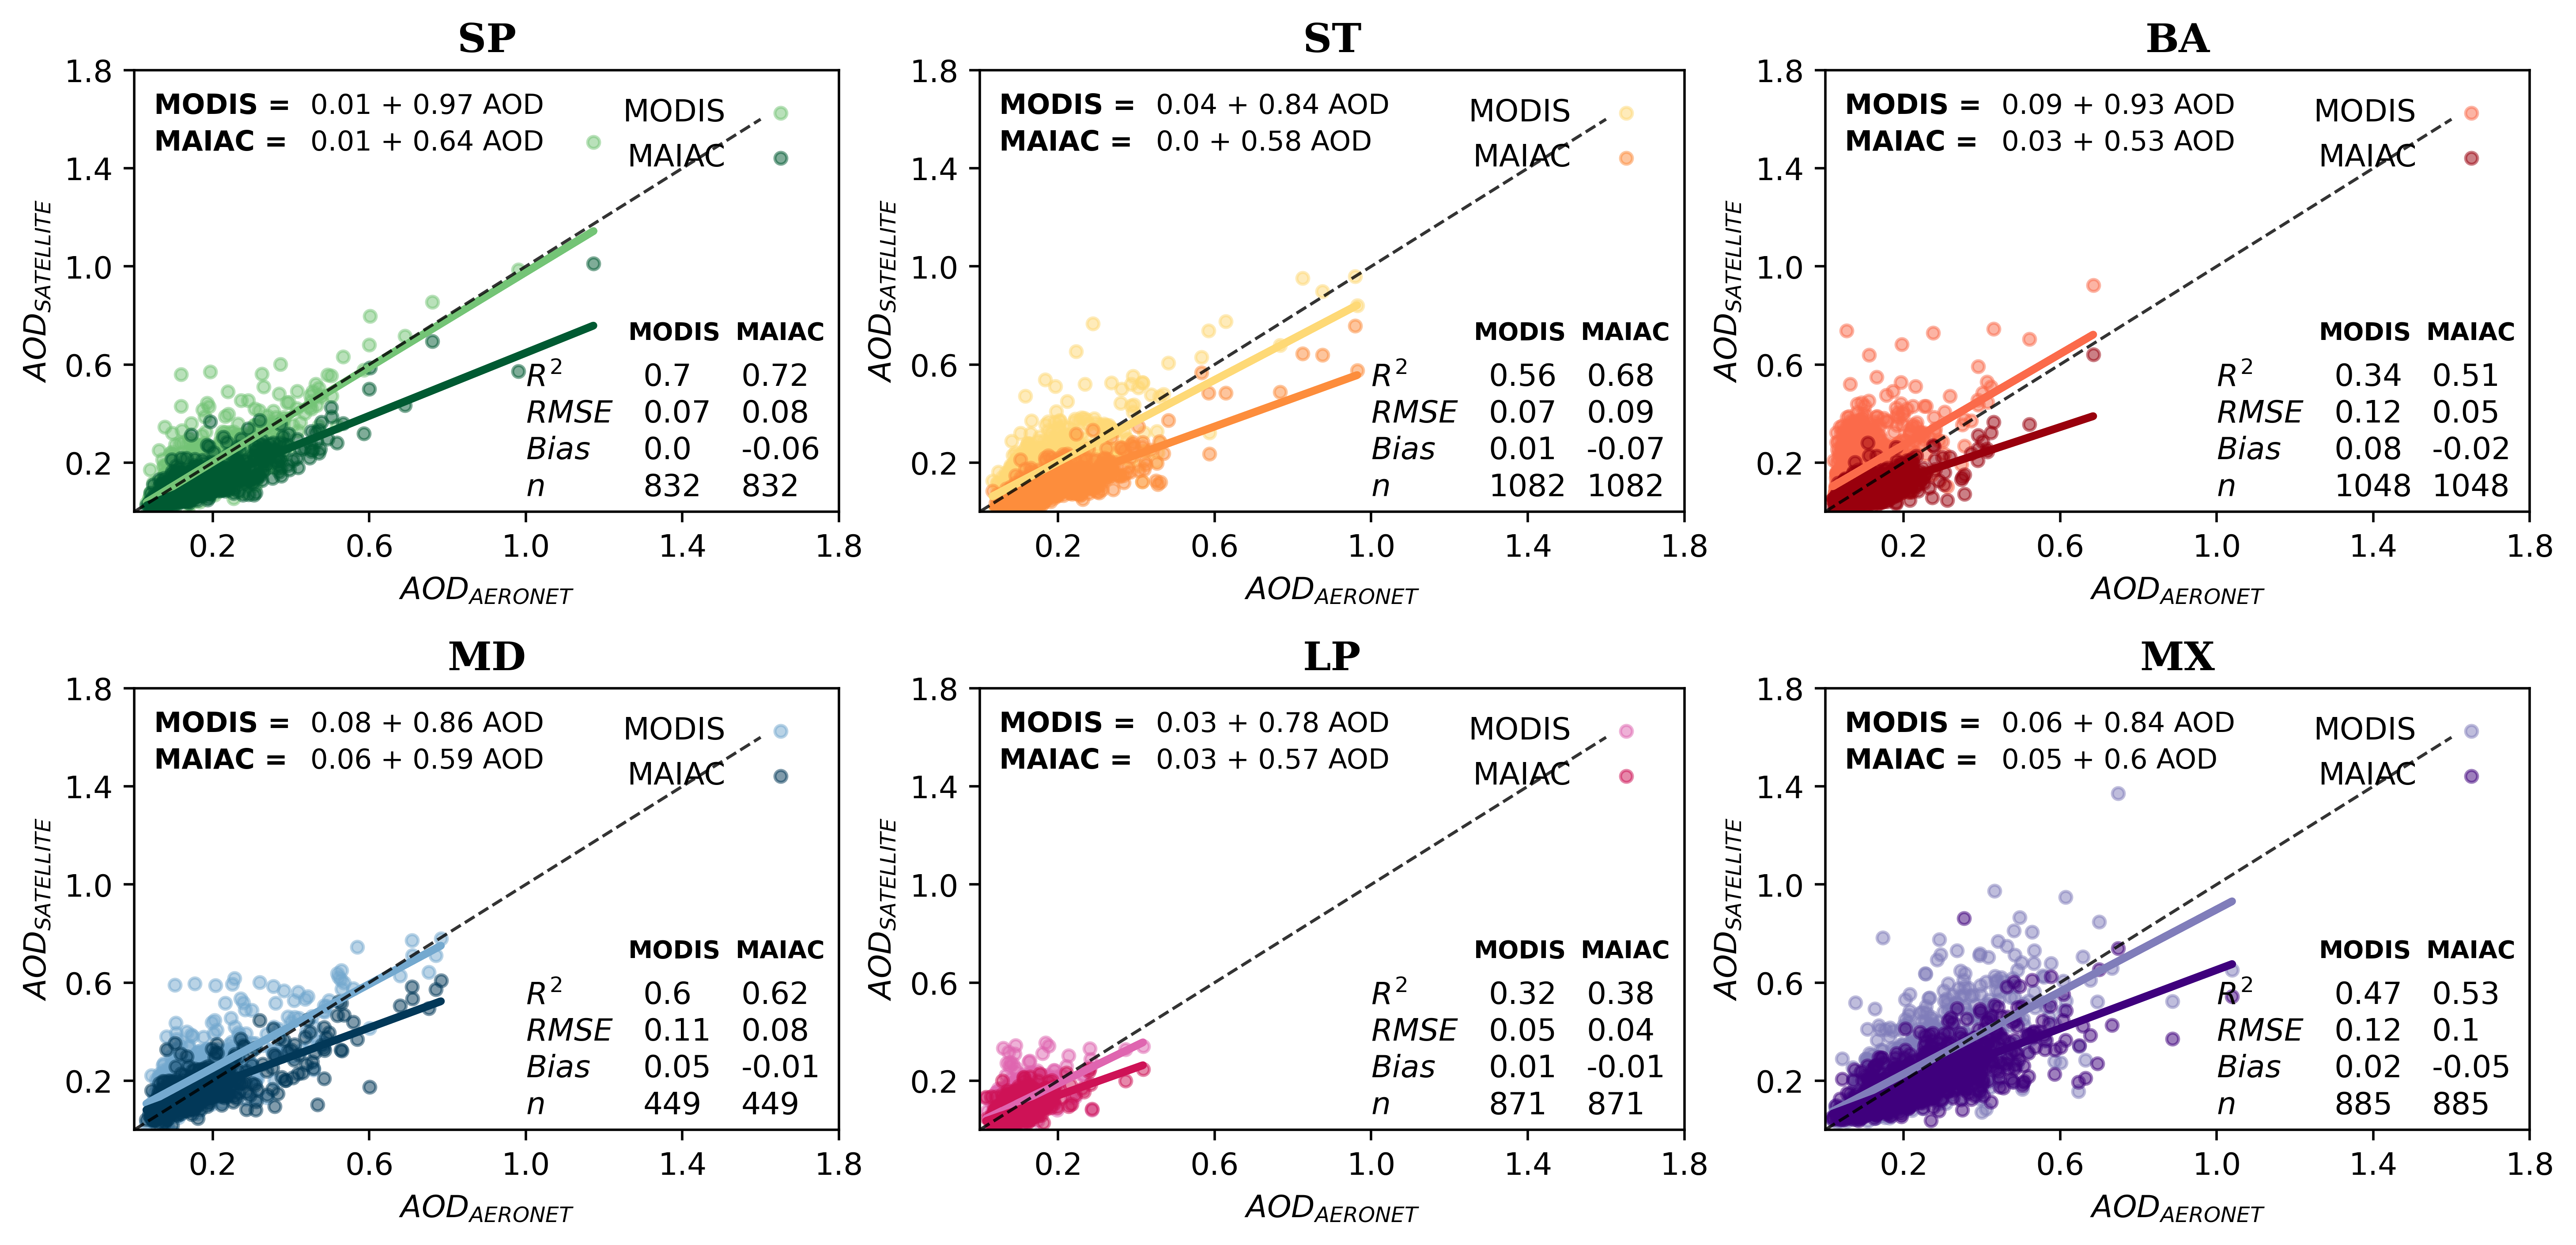

In [16]:
color_modis = ["#74c476","#fed976","#fb6a4a", "#74a9cf","#df65b0","#807dba"]
color_maiac = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"] # CHILE "#fd8d3c"
linear_regression_plot (path="D:/Josefina/paper_git/paper_maiac/datasets/processed/MMA/",date_format='%Y-%m-%d',nrows=2,ncols=3,color_modis = color_modis,color_maiac =color_maiac ,plot='LALAL')


0
1
2
3
4
5


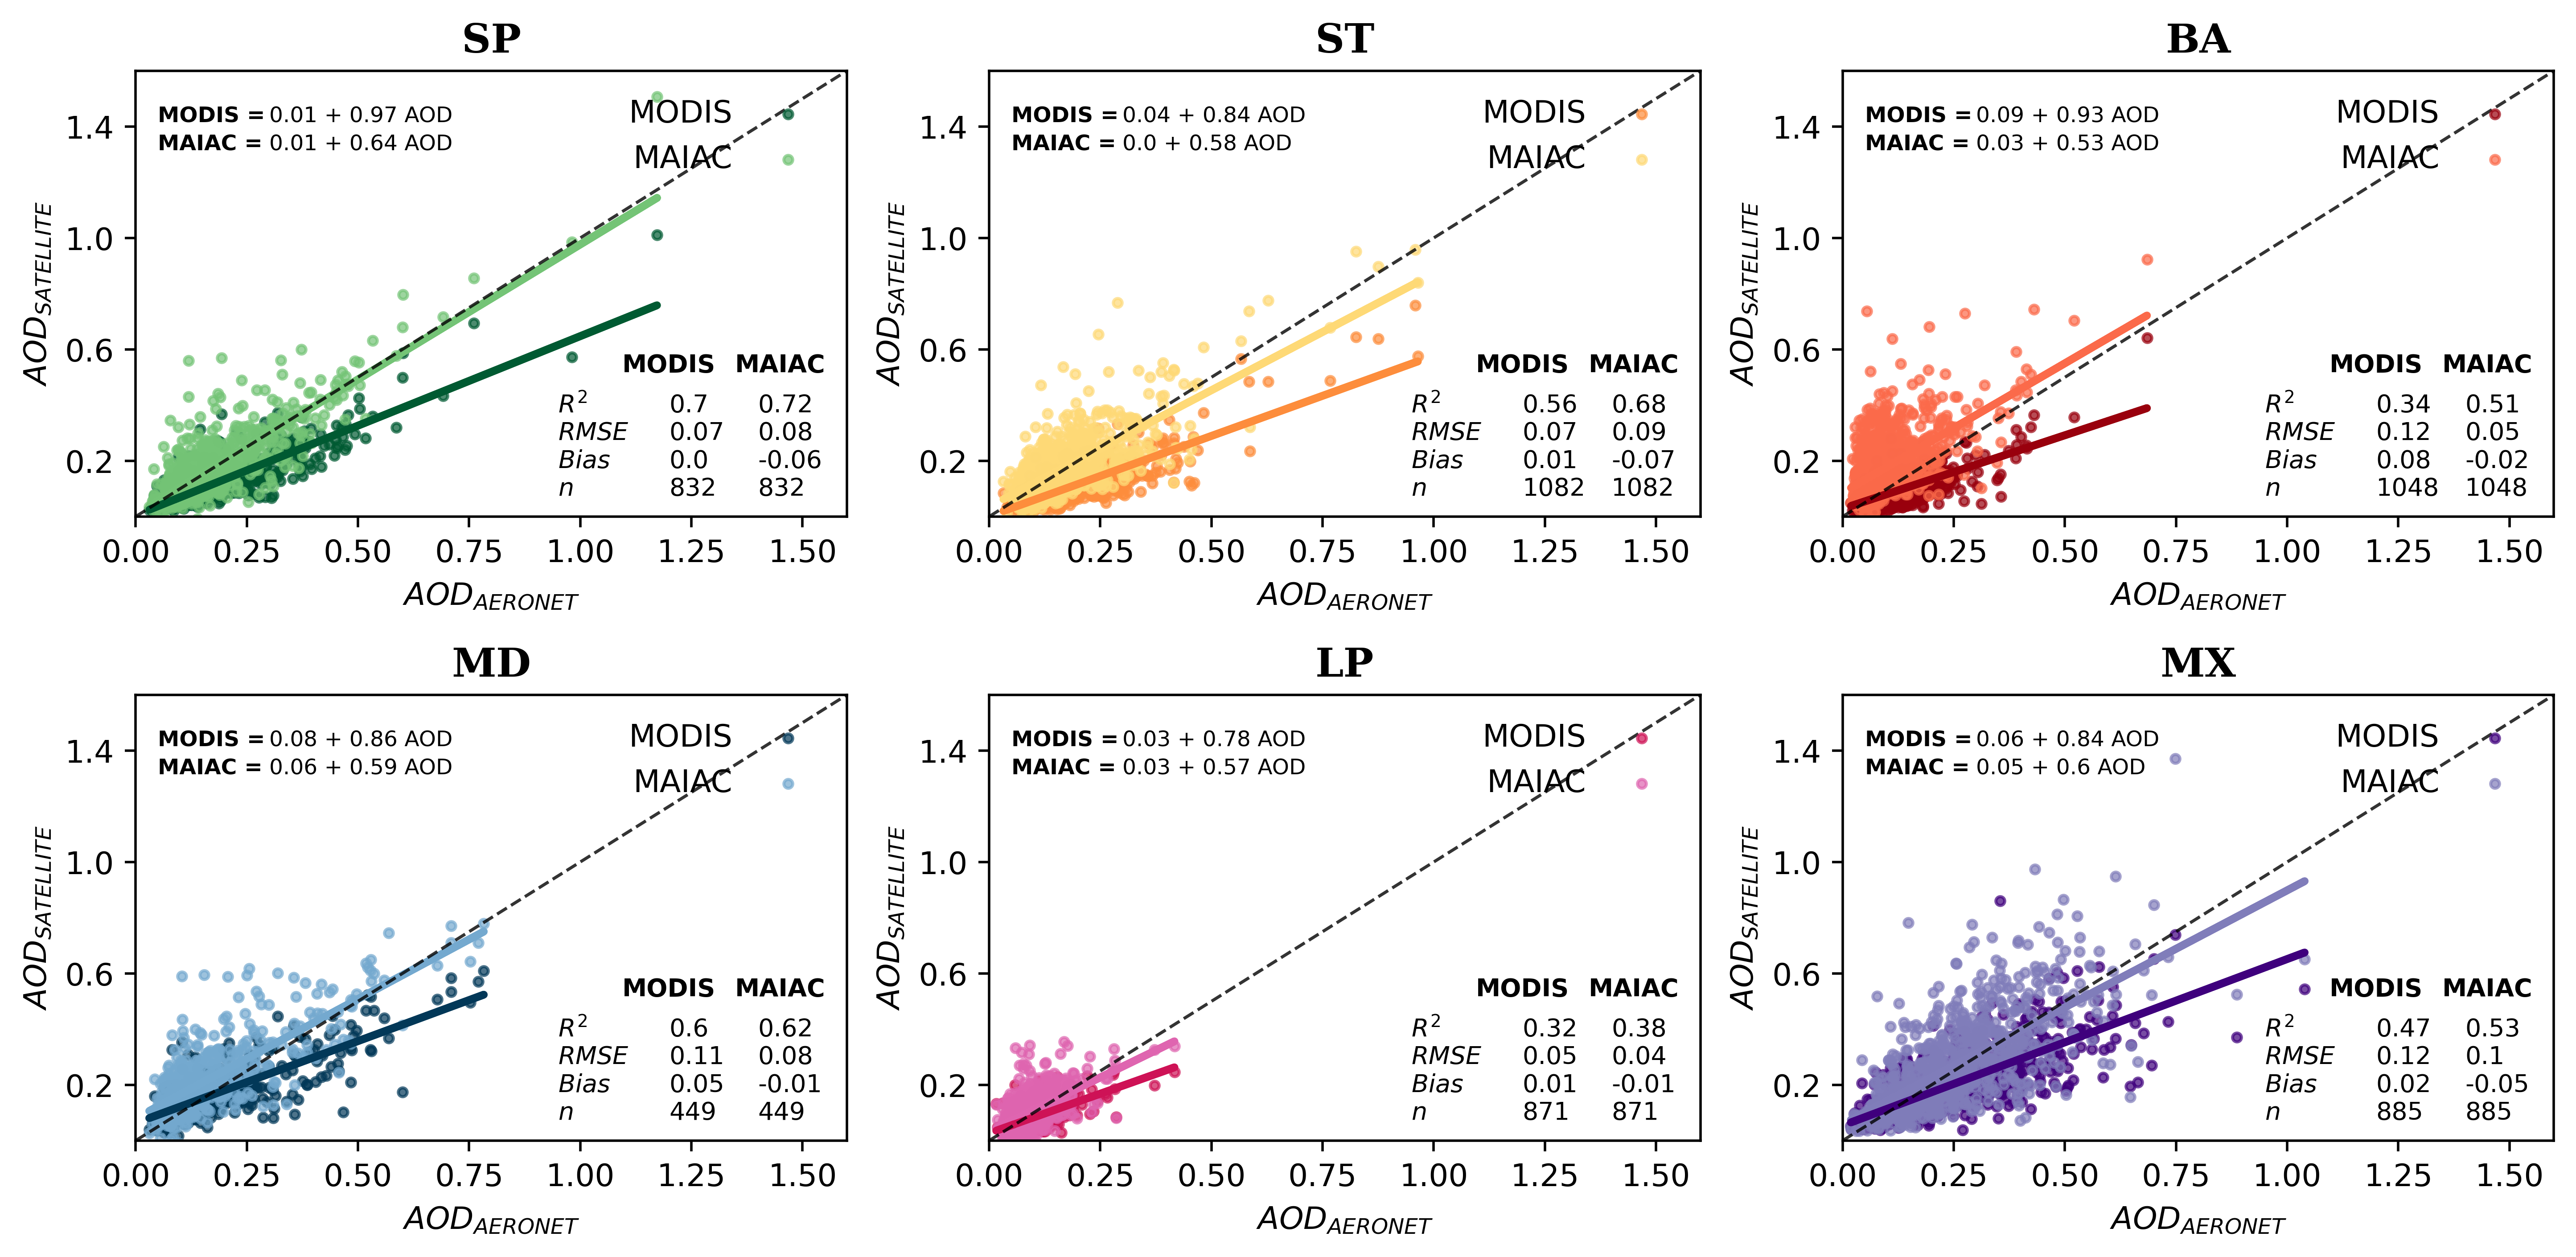

In [5]:
linear_regression_plot (path="D:/Josefina/paper_git/paper_maiac/datasets/processed/MMA/",date_format='%Y-%m-%d',nrows=2,ncols=3,color_modis = ["#74c476","#fed976","#fb6a4a", "#74a9cf","#df65b0","#807dba"],color_maiac = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"],plot='na')

0


KeyError: 'date'

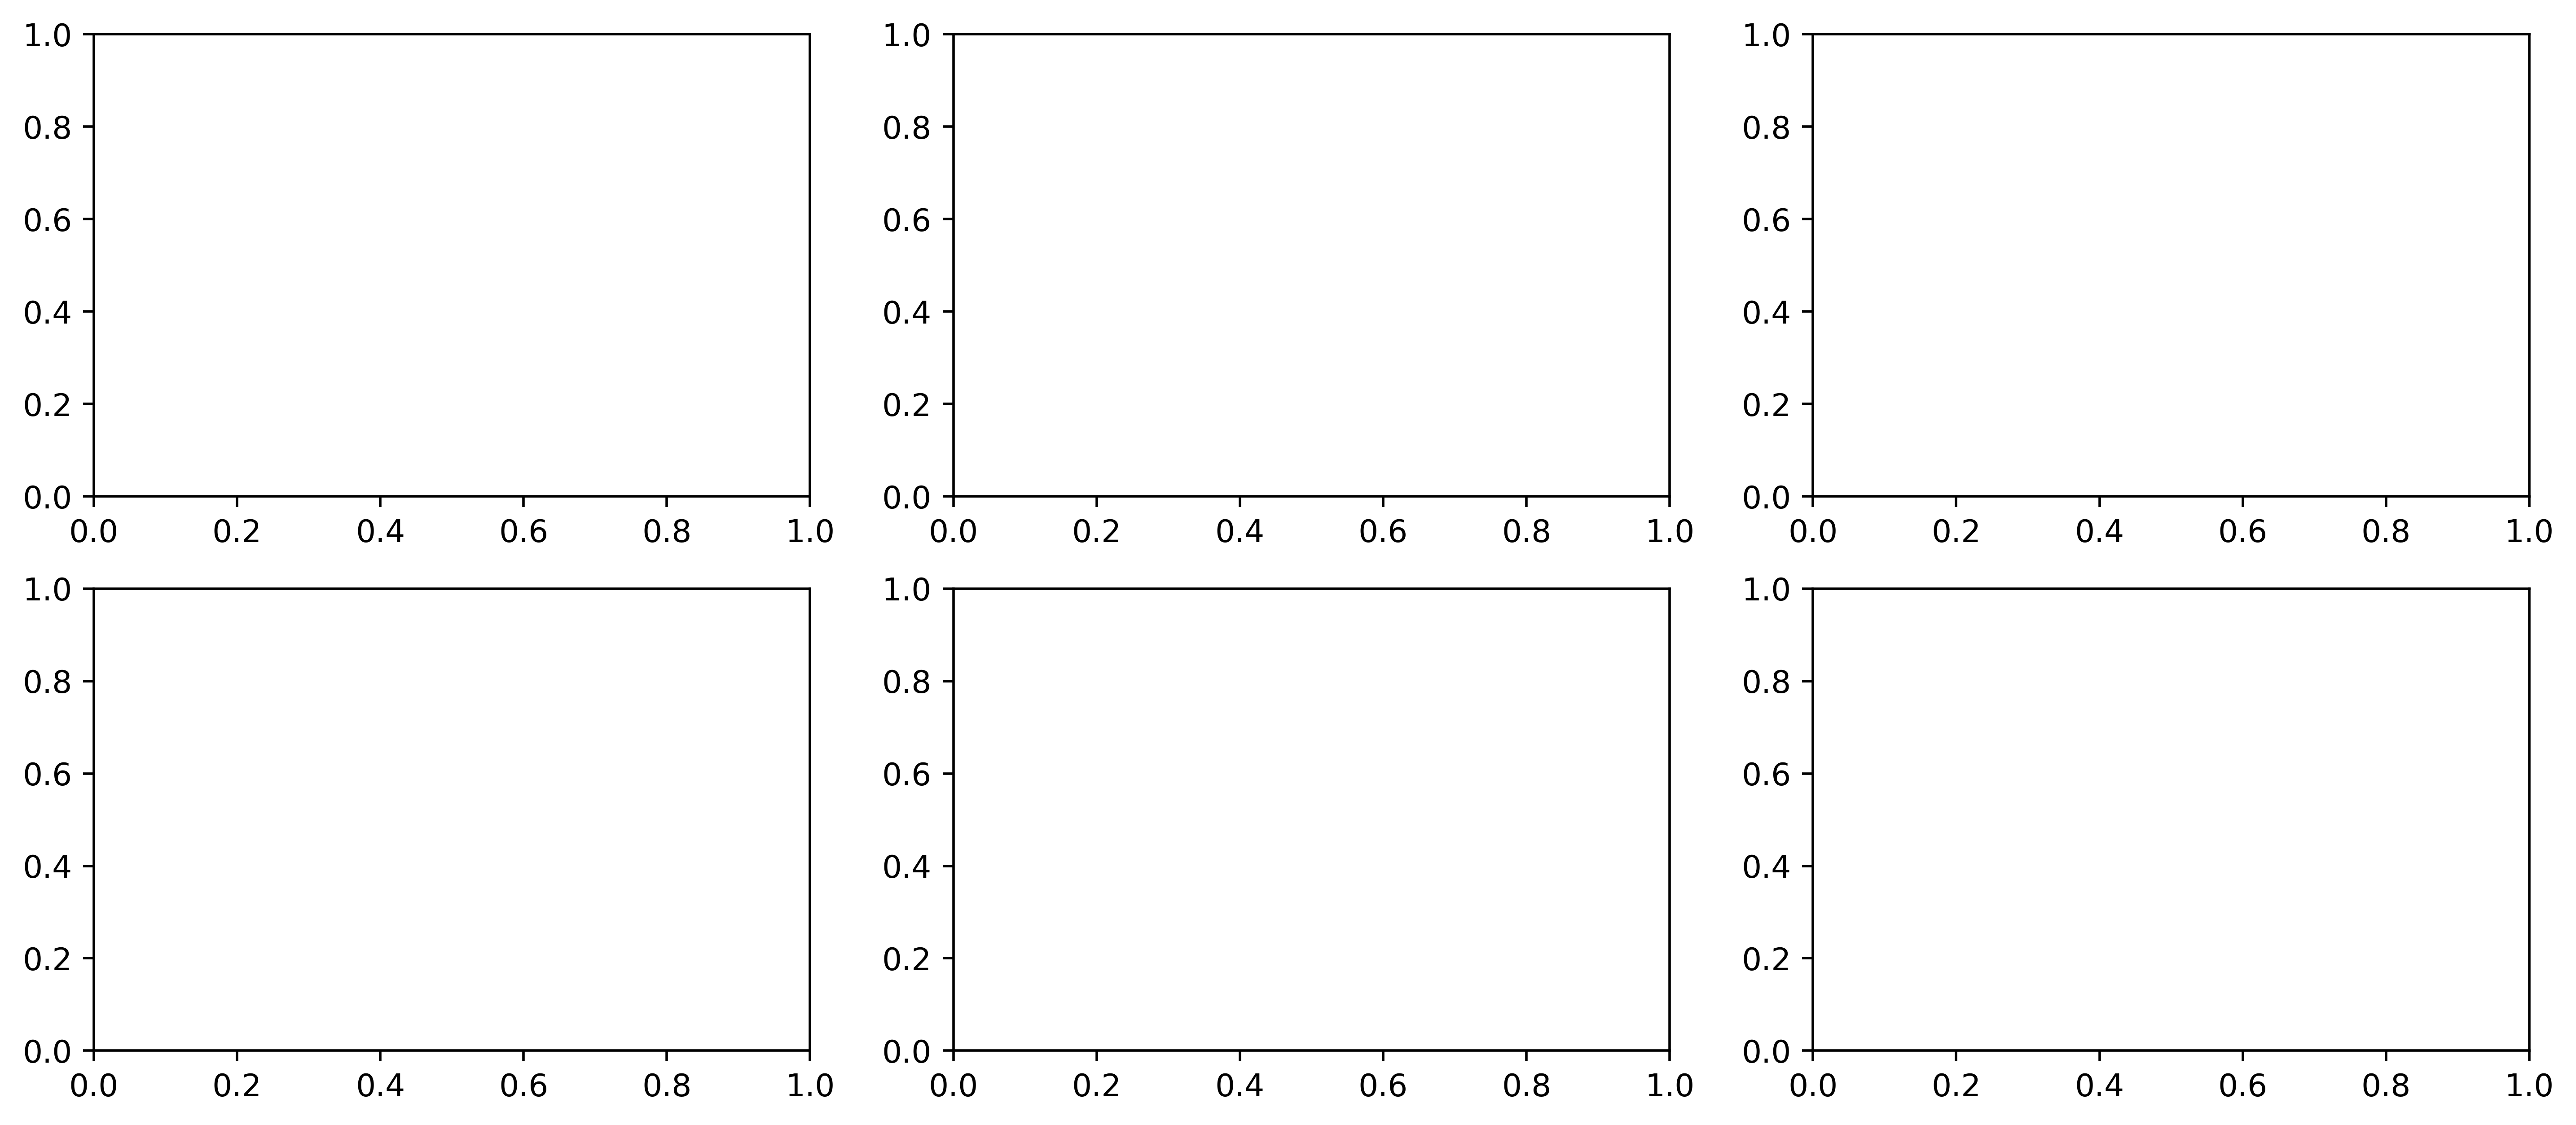

In [3]:
linear_regression_plot (path="D:/Josefina/paper_git/paper_maiac/datasets/processed/USA/",date_format='%Y-%m-%d',nrows=1,ncols=3,color_modis = ["#74c476","#fed976","#fb6a4a"],color_maiac = ["#005a32","#fd8d3c","#99000d"],plot='na')